# Homework week 2

In [90]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [91]:
# Getting the Data
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [92]:
#!wget $data

In [93]:
df = pd.read_csv('housing.csv')

In [94]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

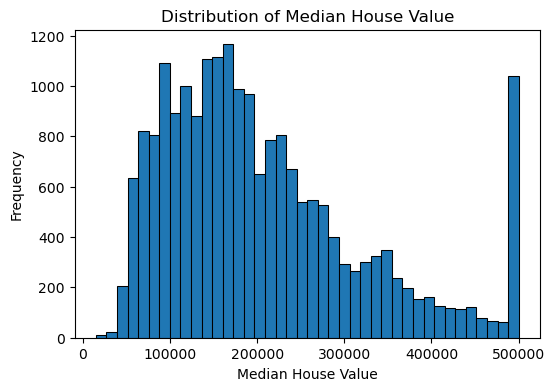

In [95]:
plt.figure(figsize=(6, 4))

sns.histplot(df['median_house_value'], bins=40,  alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Value')

plt.show()

In [96]:
print('The visualization shows us that the variable has a long tail.')

The visualization shows us that the variable has a long tail.


## Preparing the dataset

In [97]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [98]:
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

df = df[selected_columns].reset_index(drop=True)

In [99]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question 1

In [100]:
 df.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [101]:
print(f'The feature with missing value is { df.columns[df.isna().any()][0]}.')

The feature with missing value is total_bedrooms.


## Question 2

In [102]:
population_median = df['population'].median()
population_median

1195.0

In [103]:
print(f'The population median is {population_median}.')

The population median is 1195.0.


## Prepare and split the dataset

In [104]:
# shuffle the Dataset
n = len(df)

np.random.seed(42)

# split

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_test - n_val

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()


# log1 transformation

y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

In [105]:
# Create function to fill NAs with zeros

def prepare_X_with_zeros(df):
    df = df.copy()
    df_num = df.fillna(0)
    X = df_num.values
    return X
    

In [106]:
# Create function to fill NAs with mean

def prepare_X_with_mean(df):
    df = df.copy()
    df_num = df.fillna(df_train['total_bedrooms'].mean())
    X = df_num.values
    return X

In [107]:
# Create trainnig function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [108]:
# Create RMSE function

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [109]:
# Trainning with zeros
X_val_with_zeros = prepare_X_with_zeros(df_val)
X_train_with_zeros = prepare_X_with_zeros(df_train)

In [110]:
w_0, w = train_linear_regression(X_train_with_zeros, y_train)

In [111]:
y_pred = w_0 + X_val_with_zeros.dot(w)

In [112]:
zero_result = round(rmse(y_val, y_pred),2)

In [113]:
print(f'The result with the zero option is: {zero_result}.')

The result with the zero option is: 0.34.


In [114]:
# Trainnig with mean
X_val_with_mean = prepare_X_with_mean(df_val)
X_train_with_mean = prepare_X_with_mean(df_train)

In [115]:
w_0, w = train_linear_regression(X_train_with_mean, y_train)

In [116]:
y_pred = w_0 + X_val_with_mean.dot(w)

In [117]:
mean_result = round(rmse(y_val, y_pred),2)

In [118]:
print(f'The result with the mean option is: {mean_result}.')

The result with the mean option is: 0.34.


## Question 4

In [119]:
# Create function for linear regression reg

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [120]:
X_train = prepare_X_with_zeros(df_train)
X_val = prepare_X_with_zeros(df_val)

In [121]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print(f'r: {r}, w0: {w_0}, RMSE: {round(rmse(y_val, y_pred), 2)}')


r: 0, w0: -9.76324947792922, RMSE: 0.34
r: 1e-06, w0: -9.76322883158197, RMSE: 0.34
r: 0.0001, w0: -9.761185235939118, RMSE: 0.34
r: 0.001, w0: -9.74264624988528, RMSE: 0.34
r: 0.01, w0: -9.561056193156471, RMSE: 0.34
r: 0.1, w0: -8.058889769818062, RMSE: 0.34
r: 1, w0: -3.1331542785822872, RMSE: 0.34
r: 5, w0: -0.8410867975333891, RMSE: 0.35
r: 10, w0: -0.4381172315908744, RMSE: 0.35


## Question 5

In [122]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = []

for seed in seeds:
    np.random.seed(seed)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_test - n_val

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled[:n_train].copy()
    df_val = df_shuffled[n_train:n_train+n_val].copy()
    df_test = df_shuffled[n_train+n_val:].copy()


    # log1 transformation

    y_train_orig = df_train['median_house_value'].values
    y_val_orig = df_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_val_with_zeros = prepare_X_with_zeros(df_val)
    X_train_with_zeros = prepare_X_with_zeros(df_train)
    
    w_0, w = train_linear_regression(X_train_with_zeros, y_train)
    y_pred = w_0 + X_val_with_zeros.dot(w)
    
    zero_result = rmse(y_val, y_pred)
    
    results.append(zero_result)


rmse_std = round(np.std(results), 3)

print(f'The STD of the results is: {rmse_std}.')

The STD of the results is: 0.005.


## Question 6

In [123]:
np.random.seed(9)
r  = 0.001

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_test - n_val

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.log1p(df_full_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_full_train['median_house_value']
del df_test['median_house_value']

X_full_train_with_zeros = prepare_X_with_zeros(df_full_train)
X_test_with_zeros = prepare_X_with_zeros(df_test)

w0, w = train_linear_regression_reg(X_full_train_with_zeros, y_full_train, r)
y_pred = w0 + X_test_with_zeros.dot(w)

result = round(rmse(y_test, y_pred),2)

print(f'The RMSE on the test dataset is: {result}.')

The RMSE on the test dataset is: 0.33.
